In [444]:
pwd

'C:\\Users\\Muskan'

In [445]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd

In [446]:
data = pd.read_csv("Image1.txt")

In [447]:
np.random.permutation(len(data))

array([1267, 2731, 9906, ..., 6874, 4433, 9855])

In [448]:
X = data.iloc[:,0:2].values
Y = data.iloc[:,2:].values

In [449]:
y1 = Y > 1
y = y1.astype(int)
y

array([[0],
       [0],
       [0],
       ...,
       [1],
       [1],
       [1]])

In [450]:
X

array([[-2.5601, -4.0034],
       [-3.0362, -3.4911],
       [-3.6867, -1.7454],
       ...,
       [ 1.3549,  2.9592],
       [ 1.8574,  3.6503],
       [ 2.9062,  2.305 ]])

In [451]:
def sigmoid(z):
    return 1. / (1 + np.exp(-z))


def z(theta, x):
    assert theta.shape[1] == 1
    assert theta.shape[0] == x.shape[1]  # Theta should have as many rows as x has features.
    return np.dot(x, theta)


def hypothesis(theta, x):
    return sigmoid(z(theta, x))


def cost(theta, x, y):
    assert x.shape[1] == theta.shape[0]  # x has a column for each feature, theta has a row for each feature.
    assert x.shape[0] == y.shape[0]  # One row per sample.
    assert y.shape[1] == 1
    assert theta.shape[1] == 1
    h = hypothesis(theta, x)
    one_case = np.matmul(-y.T, np.log(h))
    zero_case = np.matmul(-(1 - y).T, np.log(1 - h))
    return (one_case + zero_case) / len(x)


def gradient_descent(theta, x, y, learning_rate, regularization = 0):
    regularization = theta * regularization
    error = hypothesis(theta, x) - y
    n = (learning_rate / len(x)) * (np.matmul(x.T, error) + regularization)
    return theta - n


def minimize(theta, x, y, iterations, learning_rate, regularization = 0):
    costs = []
    for _ in range(iterations):
        theta = gradient_descent(theta, x, y, learning_rate, regularization)
        costs.append(cost(theta, x, y)[0][0])
    return theta, costs

In [452]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state= 42)

In [453]:
m = y_train.size
x = X_train
X_train = np.hstack(((np.matrix(np.ones(m).reshape(m,1))),x))
theta0 = np.zeros(X_train.shape[1]).reshape(X_train.shape[1],1)
theta, costs = minimize(theta0, X_train, y_train, 1500, 0.0005, 0.5)
print(costs[-1])

n = y_test.size
xt = X_test
X_test = np.hstack(((np.matrix(np.ones(n).reshape(n,1))),xt))

[[0.09435194]]


In [454]:
X_train.shape


(6699, 3)

In [455]:

from sklearn import linear_model
clf1 = linear_model.LogisticRegression(C=1e5, solver='lbfgs')

In [456]:
clf1.fit(X_train, y_train)


C:\Users\Muskan\Anaconda3\lib\site-packages\sklearn\utils\validation.py:752: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=100000.0, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='warn', n_jobs=None, penalty='l2', random_state=None,
          solver='lbfgs', tol=0.0001, verbose=0, warm_start=False)

In [457]:
preds = clf1.predict(X_test)

In [458]:
clf1.score(X_test, y_test)

1.0

In [459]:
X1 = data.iloc[:,0:2]
Y1 = data.iloc[:,-1]
y = y.ravel()

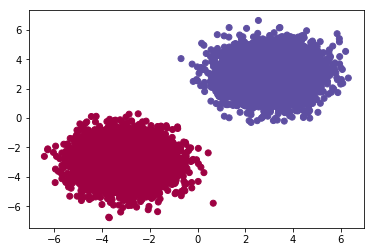

In [460]:
plt.scatter(X[:,0], X[:,1], c=Y1, cmap = plt.cm.Spectral)
plt.show()

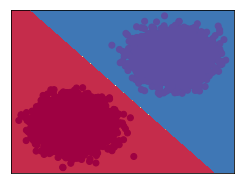

In [461]:

clf1.fit(X,y)
   
x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
h = 0.01
    
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
   
Z = clf1.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.figure(1, figsize=(4, 3))
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Spectral)
    
plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Spectral)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xticks(())
plt.yticks(())

plt.show()